Goal:

*  Discuss how to work with input data that is beyond one dimension

Task:

Try to build a simple neural network which will discover lanes on a road in a simplistic way


In [328]:
import numpy as np
import cv2
import glob
import matplotlib.image as mpimg
import matplotlib.pyplot as plt
%matplotlib inline

In [329]:
from pylab import rcParams
rcParams['figure.figsize'] = 10, 10

Try fixing up the images so that we can build a hand crafted neural net...

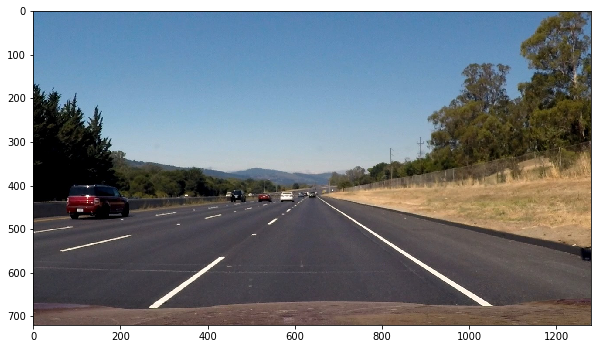

In [330]:
# channels are "R, G, B"
img1 = mpimg.imread('straight_lines2.jpg')
plt.imshow(img1)

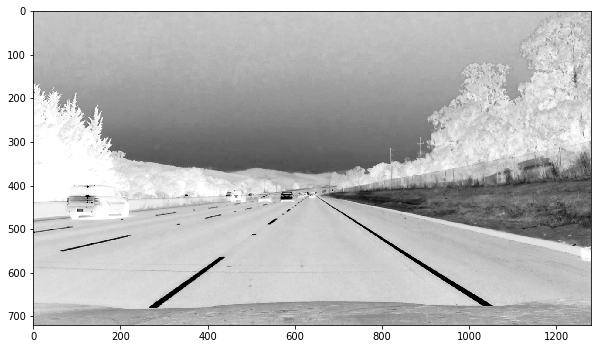

In [331]:
# read channel
rimg = img1[:, :, 0]
plt.imshow(rimg, cmap="Greys")

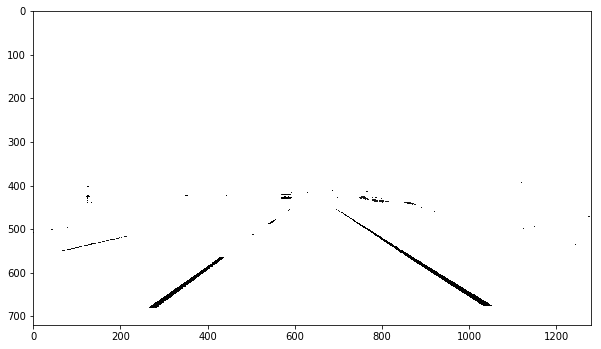

In [332]:
rimg[rimg[:, :] < 230] = 0
plt.imshow(rimg, cmap="Greys")

In [333]:
def activation_relu(x):
    # relu activation function
    return np.maximum(x, 0)

In [334]:
"""
## Building a threshold

If our data is 0 - 9, and we wish to learn a "non-linear" relationship -
i.e. hinge function at point 0

```
max(X - 5, 0)
```

Then the relationship in a neural network can be encoded as follows...
"""
X = np.array(range(10)).reshape(-1, 1)
# add bias
X = np.hstack([X, np.ones(shape=X.shape)])
print("Input data:\n{}".format(X))
# hardcode rule:
print("With hardcoded weights and relu:\n{}".format(activation_relu(X.dot([[1], [-4.5]]))))

Input data:
[[ 0.  1.]
 [ 1.  1.]
 [ 2.  1.]
 [ 3.  1.]
 [ 4.  1.]
 [ 5.  1.]
 [ 6.  1.]
 [ 7.  1.]
 [ 8.  1.]
 [ 9.  1.]]
With hardcoded weights and relu:
[[ 0. ]
 [ 0. ]
 [ 0. ]
 [ 0. ]
 [ 0. ]
 [ 0.5]
 [ 1.5]
 [ 2.5]
 [ 3.5]
 [ 4.5]]


In [335]:
# then a 2d example

img_1 = np.array([
    [10, 6, 7, 1], 
    [ 5, 4, 8, 1]
])
weights = np.vstack([np.eye(3), np.ones((1, 3))*-5])
print("input:\n{}".format(img_1))
print("weights:\n{}".format(weights))
print("solution:\n{}".format(activation_relu(img_1.dot(weights))))

input:
[[10  6  7  1]
 [ 5  4  8  1]]
weights:
[[ 1.  0.  0.]
 [ 0.  1.  0.]
 [ 0.  0.  1.]
 [-5. -5. -5.]]
solution:
[[ 5.  1.  2.]
 [ 0.  0.  3.]]


In [336]:
"""
lets construct a neural network by hand to learn this!

Rule to learn:

* Take in a color image
* Take out Red channel
* Put on the threshold/rule
* output image.

"""

print("Image is of size {}".format(img1.shape))

# remember the input also has a bias term...

Image is of size (720, 1280, 3)


In [337]:
def rgb_to_2dimg(img):
    img1_swap = np.swapaxes(img, 1, 2)
    img2 = img1_swap.flatten()
    img3 = img2.reshape(img.shape[0], img.shape[1]*3)
    return img3

Image shape: (720, 3840)


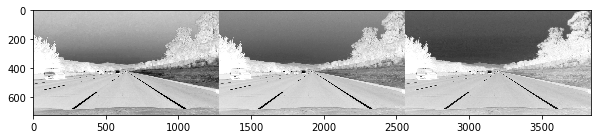

In [338]:
img1 = mpimg.imread('straight_lines2.jpg')
img1_flat = rgb_to_2dimg(img1)
plt.imshow(img1_flat, cmap="Greys")
# flattened 2 image, into RED GREEN BLUE
print("Image shape: {}".format(img1_flat.shape))

In [339]:
# step one - we need to know the target output shape - which is 720, 1280
# so then the weights is what??

w = np.zeros((3840, 1280))
img1_flat.dot(w).shape

(720, 1280)

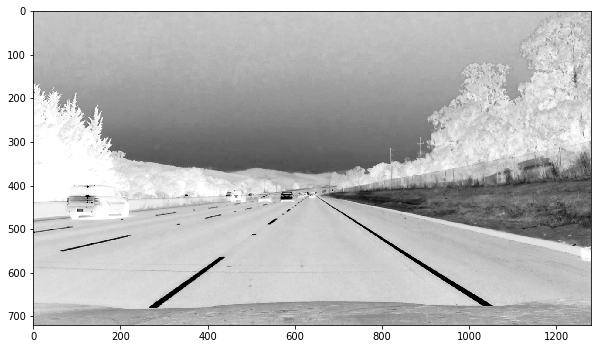

In [340]:
# next step determine how to only get the red part of the matrix
w1 = np.zeros((3840, 1280))
# want to get the first 1280 cols only
w1[:1280, :1280] = np.eye(1280)
plt.imshow(img1_flat.dot(w1), cmap="Greys")

In [341]:
# add the bias unit!
def rgb_to_2dimg_bias(img):
    img1_swap = np.swapaxes(img, 1, 2)
    img2 = img1_swap.flatten()
    img3 = img2.reshape(img.shape[0], img.shape[1]*3)
    
    img_flat = np.hstack([img3, np.ones((img3.shape[0], 1))])
    return img_flat

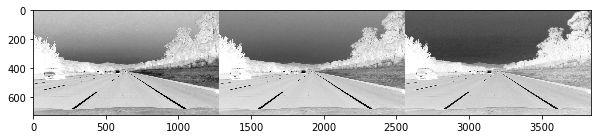

In [342]:
img1 = mpimg.imread('straight_lines2.jpg')
img1_flat = rgb_to_2dimg_bias(img1)
# with bias
plt.imshow(img1_flat, cmap="Greys")

Input image is of shape: (720, 3841)
Target image is of shape: (720, 1280)
Weight matrix is of shape: (3841, 1280)
Output image is of shape: (720, 1280)


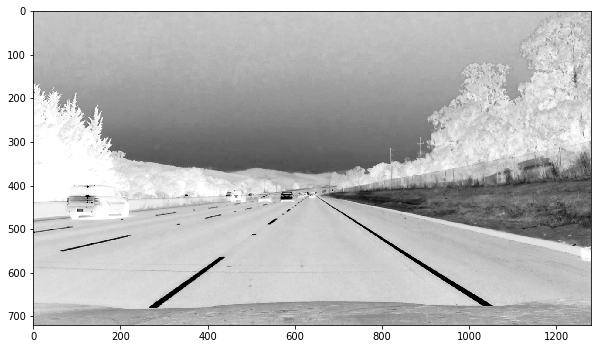

In [343]:
# target image is of size...
print("Input image is of shape: {}".format(img1_flat.shape))
print("Target image is of shape: {}".format(img1_flat[:, :1280].shape))
print("Weight matrix is of shape: {}".format((img1_flat.shape[1], 1280)))
w1 = np.zeros((img1_flat.shape[1], 1280))
# Creating an identity matrix will yield precisely the first channel, i.e. RED
w1[:1280, :1280] = np.eye(1280)
img2 = img1_flat.dot(w1)
print("Output image is of shape: {}".format(img2.shape))
plt.imshow(img2, cmap="Greys")


Input image is of shape: (720, 3841)
Target image is of shape: (720, 1280)
Weight matrix is of shape: (3841, 1280)
Output image is of shape: (720, 1280)


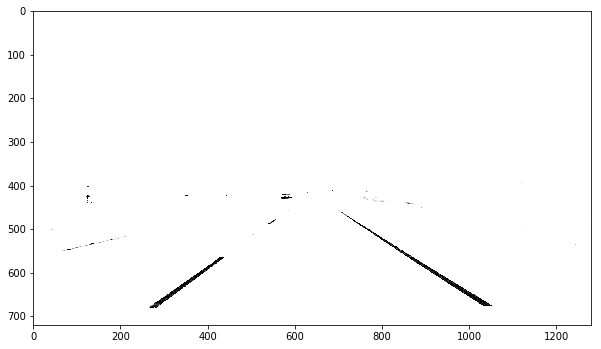

In [344]:
# target image is of size...
print("Input image is of shape: {}".format(img1_flat.shape))
print("Target image is of shape: {}".format(img1_flat[:, :1280].shape))
print("Weight matrix is of shape: {}".format((img1_flat.shape[1], 1280)))
w1 = np.zeros((img1_flat.shape[1], 1280))
# Creating an identity matrix will yield precisely the first channel, i.e. RED
w1[:1280, :1280] = np.eye(1280)
w1[-1, :] = -230
img2 = activation_relu(img1_flat.dot(w1))
print("Output image is of shape: {}".format(img2.shape))
plt.imshow(img2, cmap="Greys")

How many parameters did we have to tune?

Answer: $3841 \times 1280 = 4,916,480$

We only worked on ONE channel as well with NO hidden layers! There must be a better way to solve this...